In [1]:
import exportCSV #exports data and metadata
import NPC 
import NPC_plotting
import Analyse_deformed
import json
import numpy as np
import csv

In [2]:
data_dir = './data/' # Directory for output files

In [3]:
%matplotlib widget  

## Select config file for simulation settings

In [4]:
config = 'dynamics.yaml'

In [5]:
var = NPC.getVars(config) # Transform config file into a python dictionary 
print(json.dumps(var, indent = 4)) # Print var in an easily readable format 

{
    "rel": false,
    "n": 1,
    "nup": "(\"\",)",
    "term": "(\"\", )",
    "model": "simple",
    "seed": null,
    "rvar": {
        "rnew": null,
        "rsigma": null
    },
    "thetavar": {
        "thetanew": null,
        "thetasigma": null
    },
    "dvar": {
        "dnew": null,
        "dsigma": null
    },
    "symmet": 80,
    "kappa": null,
    "shiftsigma": null,
    "elliptvar": {
        "elliptnew": null,
        "elliptsigma": null
    },
    "mag": 0,
    "zmag": 0,
    "sigmamult": 0.2,
    "nConnect": 2,
    "damp": 1,
    "kr": 0.7,
    "kmult": 1,
    "tlast": 200,
    "step": 1
}


# Modify simulation parameters
Example values shown here can be vastly different than the ones for simulating NPC shapes

In [6]:
var["seed"] = 51235 #seed for reproducibility. Any number but 0
var["tlast"] = 75 # last time-step. Choose to accommodate deformation
var["step"] = 0.25 # duration between saved time-steps. frames = var["tlast"]/var["step"]
var["symmet"] = 80 # Symmetry of the "NPC" 

In [7]:
# Select model
var["model"] = "Simple" # Not an NPC model 

In [8]:
## Variability parameters
var["mag"] = 30 # Magnitude of irregular variability.
var["zmag"] = var["mag"]/2 # magnitude of offset in z. Not computed via springs 

var["sigmamult"] = 0.2 # modifies correlation of forces by distance. Standardised to model radius. Smaller numbers lead to more irregular deformations.
var["nConnect"] = 3 # Influences number of springs 
var["damp"] = 0.09 # Damping of springs. 
var["kmult"] = 0.1 # multiplier for spring-constants (= stiffness) of circumferential springs
var["kr"] = 0.1 # multiplier for spring-constants for radial springs. 0 = no springs 

In [9]:
NPCs = NPC.getNPCs(var) # Dictionary of all simulated NPCs
NPCscoords = NPC.getNPCcoords(NPCs, var) # Coordinates of NPCs 

/home/maria/.cache/pypoetry/virtualenvs/npcpy-vGJBl3Xj-py3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


# Plot model at last time-step 

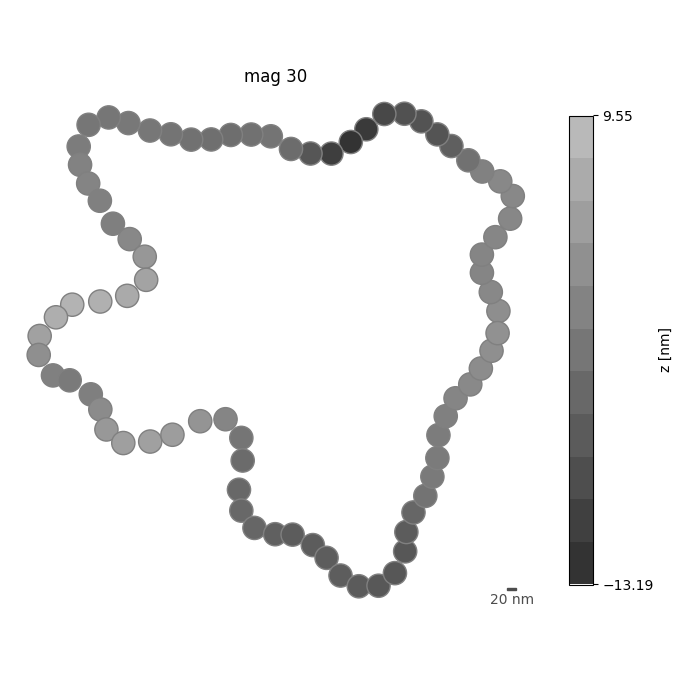

In [10]:
offset = 1.5 * np.mean(NPCs["rexp"]) # set offset to 1.5 * the expected NPC radius 
OffsetNPCs = NPC_plotting.OffsetNPCs(NPCscoords, offset)
NPC_plotting.plotOverview(OffsetNPCs, NPCs, var, width = 7, markersizemult= 1)

# Plot node coordinates over time 
to see whether model has reached a new equilibrium.   
Chaotic behaviour might also become apparent here.  
This is faster to plot than animations.  

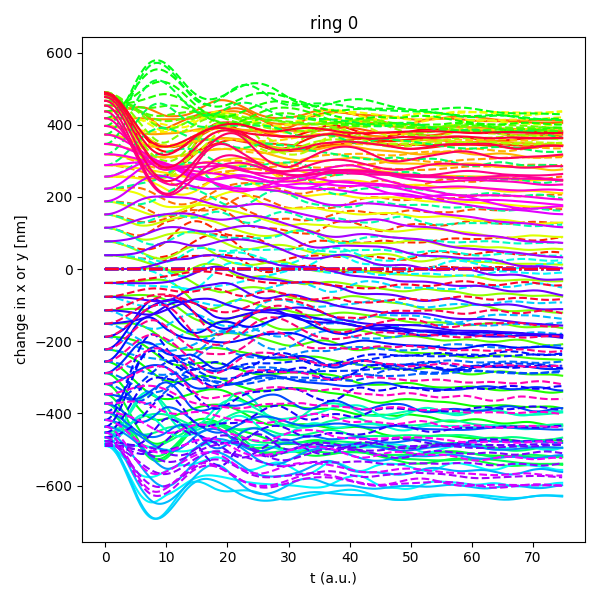

In [11]:
NPC_plotting.positionVStime(NPCs, width = 6)

# Animate 
Replace **name = None** with name = "examplename" save the animation file in the data directory.  
The name needs to be surrounded by quotation marks. Avoid special characters or whitespaces. 
change ext = ".gif" or ".mp4" to save

rerun if animation doesn't show 

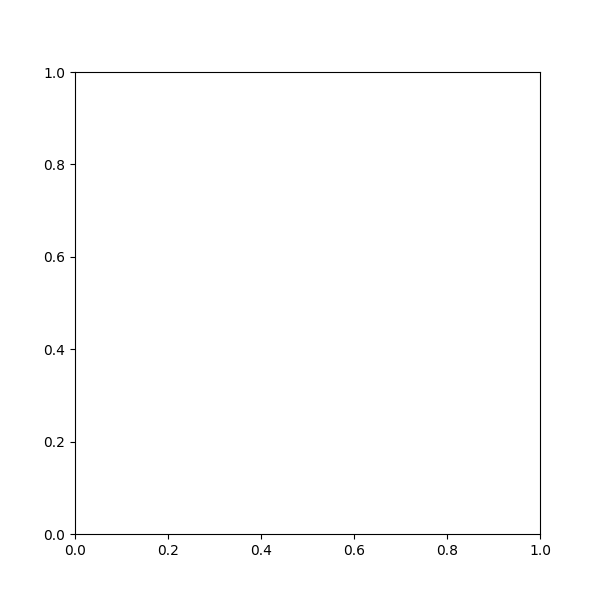

In [14]:
name = None # see above
NPC_plotting.AnimateOverview(NPCs, OffsetNPCs, var, width = 6, directory = data_dir, name = name, ext = ".gif")

# Access temporal information

In [16]:
NPCi = 0 # Index of NPC of interest
ring = 0 # Index of NPC ring of interest. 

## Access timepoints 

In [31]:
t = NPCs["NPCs"][NPCi][ring]["t"]
#print(t)

## Access information on behaviour over time

In [19]:
NPCdyn = NPCs["NPCs"][NPCi][ring]["y"]

## Explore NPCdyn

In [20]:
np.shape(NPCdyn)

(480, 300)

### There are six times as many rows as nodes: 

In [21]:
480/var["symmet"]

6.0

That's because there are **3** dimensions for every node (x, y, z) and both accelaration and position of nodes in all three dimensiosn are computed.  
The first half of rows are positions of nodes. Let's have a look at positions of all nodes at time-point 0:

In [22]:
dims = 3 # dimensions
timepoint = 0
posAt0 = NPCdyn[:dims*var["symmet"], timepoint]
# print(posAt0)

Here's coordinates (x, y, z) of node 0 at timepoint 0: 

In [23]:
posAt0[:3] # tip: Familiarise with python indexing if not already 

array([490.29717221,   0.        ,   0.        ])

Here's coordinates (x, y, z) of node 1 at timepoint 0: 

In [24]:
posAt0[3:6]

array([488.78574965,  38.46827277,   0.        ])

and so on. 
Accelleration is saved in the second half of rows: 

In [25]:
accAt0 = NPCdyn[dims*var["symmet"]:, timepoint]
#print(accAt0) # Acceleration is 0 at the start 

### Columns of NPCdyn contain all time-frames

In [26]:
frames = var["tlast"]/var["step"]
np.shape(NPCdyn)[1] == frames 

True

# Access position of all nodes over all time-pints

In [27]:
nodes_time = NPCdyn[:dims*var["symmet"], :]
print(nodes_time)

[[ 4.90297172e+02  4.89979768e+02  4.89039026e+02 ...  3.79491290e+02
   3.79378904e+02  3.79261448e+02]
 [ 0.00000000e+00 -2.64765934e-06 -8.23038200e-05 ...  3.94221057e+00
   3.88768827e+00  3.80951366e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 4.88785750e+02  4.88474406e+02  4.87551625e+02 ...  3.77042948e+02
   3.77237569e+02  3.77444457e+02]
 [-3.84682728e+01 -3.84437703e+01 -3.83711560e+01 ... -4.53149230e+01
  -4.50509943e+01 -4.47022524e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
